In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\kaurn\AppData\Local\Temp\ipykernel_2084\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
import cv2
import imghdr


In [6]:
import cv2

In [7]:
from PIL import Image

In [8]:
data_dir = 'Data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path

In [11]:

import numpy as np
from matplotlib import pyplot as plt

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 967 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

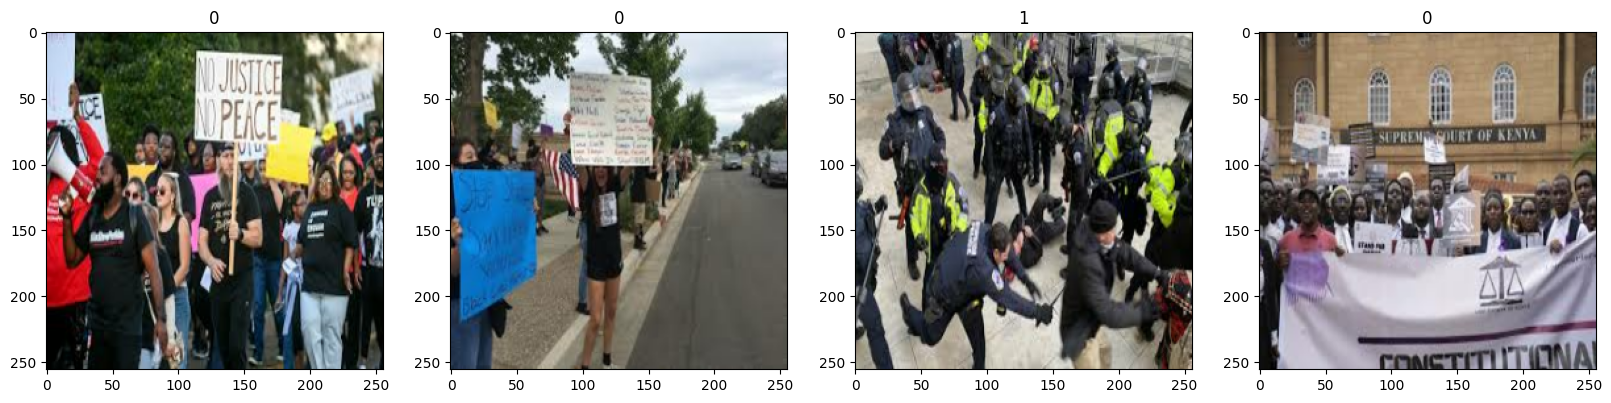

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
len(data)

31

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.3627451 , 0.3509804 , 0.40392157],
          [0.35490197, 0.34705883, 0.4       ],
          [0.82941175, 0.82941175, 0.8686274 ],
          ...,
          [0.17450981, 0.19019608, 0.15882353],
          [0.22941177, 0.24901961, 0.23333333],
          [0.25686276, 0.2764706 , 0.2509804 ]],
 
         [[0.34117648, 0.33137256, 0.37843138],
          [0.27450982, 0.2509804 , 0.28039217],
          [0.4745098 , 0.46862745, 0.49019608],
          ...,
          [0.16078432, 0.18039216, 0.16078432],
          [0.2       , 0.20980392, 0.21568628],
          [0.19215687, 0.19411765, 0.18039216]],
 
         [[0.46078432, 0.44313726, 0.48039216],
          [0.40588236, 0.36666667, 0.38431373],
          [0.9019608 , 0.8882353 , 0.90588236],
          ...,
          [0.21176471, 0.22941177, 0.22352941],
          [0.3764706 , 0.3764706 , 0.39803922],
          [0.40784314, 0.39803922, 0.3882353 ]],
 
         ...,
 
         [[0.35882354, 0.34313726, 0.34705883],
          [0.36274

In [20]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [21]:
test_size

4

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
val_size

6

In [25]:
test_size

4

In [26]:
train_size

21

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:

model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\kaurn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 809ms/step - accuracy: 0.5114 - loss: 1.0654 - val_accuracy: 0.4323 - val_loss: 0.7207
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 933ms/step - accuracy: 0.5982 - loss: 0.6688 - val_accuracy: 0.7083 - val_loss: 0.5944
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6803 - loss: 0.6083 - val_accuracy: 0.7500 - val_loss: 0.5494
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 976ms/step - accuracy: 0.7183 - loss: 0.5510 - val_accuracy: 0.6458 - val_loss: 0.6251
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 784ms/step - accuracy: 0.7689 - loss: 0.5744 - val_accuracy: 0.6615 - val_loss: 0.6025
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 777ms/step - accuracy: 0.8023 - loss: 0.4392 - val_accuracy: 0.7812 - val_loss: 0.4842
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 765ms/step - accuracy: 0.8909 - loss: 0.3457 - val_accuracy: 0.7656 - val_loss: 0.5602
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 826ms/step - accuracy: 0.9068 - loss: 0.2570 - val_accurac

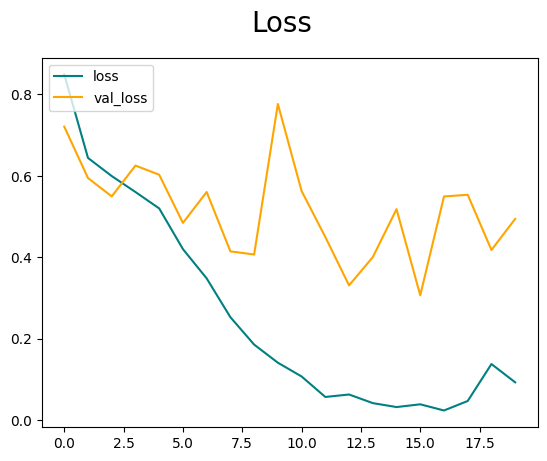

In [35]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

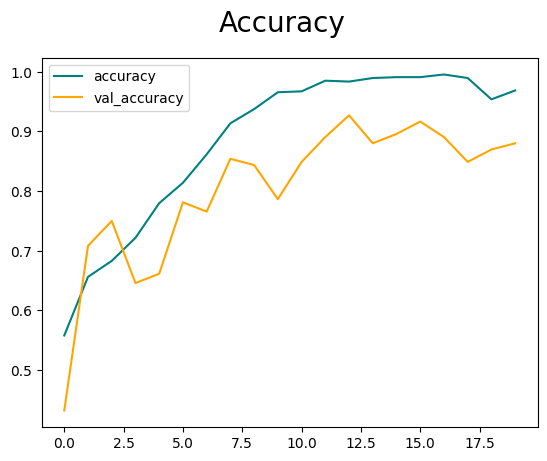

In [36]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9574468, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(0.93203884, shape=(), dtype=float32)


In [ ]:

import cv2


In [ ]:

img = cv2.imread('riot3.jpeg')
plt.imshow(img)
plt.show()

In [ ]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat


In [ ]:
if yhat > 0.5: 
    x = 1
    print(f'Predicted class is peaceful')
elif yhat < 0.5:
    x = 0
    print(f'Predicted class is riot')